In [1]:
!pip install  -q kaggle

In [2]:
!mkdir ~/.kaggle

In [3]:
!cp kaggle.json ~/.kaggle/

In [4]:
!chmod 600 /root/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d iamsouravbanerjee/animal-image-dataset-90-different-animals

100% 654M/656M [00:28<00:00, 24.3MB/s]
100% 656M/656M [00:28<00:00, 23.8MB/s]


In [6]:
!unzip /content/animal-image-dataset-90-different-animals.zip

Streaming output truncated to the last 5000 lines.
  inflating: animals/animals/bison/73b10839bc.jpg  
  inflating: animals/animals/bison/74dc1dd32a.jpg  
  inflating: animals/animals/bison/75ab166a7d.jpg  
  inflating: animals/animals/bison/79e1610d01.jpg  
  inflating: animals/animals/bison/7ba5eee91f.jpg  
  inflating: animals/animals/bison/7d214aab4b.jpg  
  inflating: animals/animals/bison/7f2ef9ab03.jpg  
  inflating: animals/animals/bison/82ec723a4f.jpg  
  inflating: animals/animals/bison/85e145af6c.jpg  
  inflating: animals/animals/bison/862e2c6379.jpg  
  inflating: animals/animals/bison/87a5c700ad.jpg  
  inflating: animals/animals/bison/88b723ce90.jpg  
  inflating: animals/animals/bison/8c3af742c3.jpg  
  inflating: animals/animals/bison/8e34044b98.jpg  
  inflating: animals/animals/bison/8e6adbdc40.jpg  
  inflating: animals/animals/bison/8fce80d5ba.jpg  
  inflating: animals/animals/bison/961a895686.jpg  
  inflating: animals/animals/bison/984a5b583d.jpg  
  inflating: 

**Specify the dataset path**

In [7]:
import os
import cv2

# Set the paths for the dataset directory
dataset_dir = "/content/animals/animals"

# Set the target size for resizing
target_height = 225
target_width = 225

# List all directories in the dataset directory
dir_list = [d for d in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, d))]

# Process each class directory
for class_dir in dir_list:
    class_path = os.path.join(dataset_dir, class_dir)

    # List all image files in the class directory
    file_list = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]

    # Process each image file
    for file_name in file_list:
        file_path = os.path.join(class_path, file_name)

        # Read the image
        image = cv2.imread(file_path)

        # Resize the image
        resized_image = cv2.resize(image, (target_width, target_height))

        # Save the resized image, overwriting the original image
        cv2.imwrite(file_path, resized_image)

print("Images resized successfully.")

Images resized successfully.


In [8]:
import random
import shutil

# Set the paths for the dataset and the destination directories
dataset_dir = "/content/animals/animals"
train_dir = "/content/train"
test_dir = "/content/test"

# List all directories in the dataset directory
dir_list = [d for d in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, d))]

# Process each class directory
for class_dir in dir_list:
    class_path = os.path.join(dataset_dir, class_dir)

    # Create train and test directories for the current class
    train_class_dir = os.path.join(train_dir, class_dir)
    test_class_dir = os.path.join(test_dir, class_dir)
    os.makedirs(train_class_dir, exist_ok=True)
    os.makedirs(test_class_dir, exist_ok=True)

    # List all image files in the class directory
    file_list = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]

    # Calculate the number of files for training and testing
    num_files = len(file_list)
    num_train_files = int(num_files * 0.8)  # 80% for training
    num_test_files = num_files - num_train_files  # 20% for testing

    # Randomly shuffle the file list
    random.shuffle(file_list)

    # Move files to the train directory
    for file_name in file_list[:num_train_files]:
        src_path = os.path.join(class_path, file_name)
        dst_path = os.path.join(train_class_dir, file_name)
        shutil.copy(src_path, dst_path)

    # Move files to the test directory
    for file_name in file_list[num_train_files:]:
        src_path = os.path.join(class_path, file_name)
        dst_path = os.path.join(test_class_dir, file_name)
        shutil.copy(src_path, dst_path)

print("Dataset split into train and test directories.")

Dataset split into train and test directories.


**Importing Required pakages**

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing import image
import numpy as np

**Data Augmentation**

In [10]:
train_datagen = ImageDataGenerator(rescale = 1./255,zoom_range = 0.2,horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
xtrain = train_datagen.flow_from_directory('/content/train',
                                           target_size =(225,225),
                                           class_mode = 'categorical',
                                           batch_size = 100)

Found 4320 images belonging to 90 classes.


In [12]:
xtest = test_datagen.flow_from_directory('/content/test',
                                           target_size =(225,225),
                                           class_mode = 'categorical',
                                           batch_size = 100)

Found 1080 images belonging to 90 classes.


**CNN Model**

In [13]:
num_classes = len(xtrain.class_indices)
model = Sequential() # Initializing sequential model
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(225,225,3))) # convolution layer
model.add(MaxPooling2D(pool_size=(2, 2))) # Max pooling layer
model.add(Flatten()) # Flatten layer
model.add(Dense(1200,activation='relu')) # Hidden layer 1
model.add(Dense(600,activation='relu')) # Hidden layer 2
model.add(Dense(num_classes,activation='softmax')) # Output layer

In [14]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

**Training the model**

In [23]:
# Train the model
model.fit(xtrain, epochs=10, steps_per_epoch=len(xtrain), validation_data=xtest, validation_steps=len(xtest))

Epoch 1/10
44/44 [==============================] - 57s 1s/step - loss: 0.2181 - accuracy: 0.9400 - val_loss: 5.3877 - val_accuracy: 0.3370
Epoch 2/10
44/44 [==============================] - 56s 1s/step - loss: 0.2313 - accuracy: 0.9382 - val_loss: 5.2654 - val_accuracy: 0.3565
Epoch 3/10
44/44 [==============================] - 55s 1s/step - loss: 0.2041 - accuracy: 0.9419 - val_loss: 5.5718 - val_accuracy: 0.3528
Epoch 4/10
44/44 [==============================] - 55s 1s/step - loss: 0.1782 - accuracy: 0.9521 - val_loss: 5.5759 - val_accuracy: 0.3481
Epoch 5/10
44/44 [==============================] - 56s 1s/step - loss: 0.1653 - accuracy: 0.9563 - val_loss: 5.7193 - val_accuracy: 0.3500
Epoch 6/10
44/44 [==============================] - 57s 1s/step - loss: 0.1792 - accuracy: 0.9512 - val_loss: 5.6507 - val_accuracy: 0.3639
Epoch 7/10
44/44 [==============================] - 55s 1s/step - loss: 0.1640 - accuracy: 0.9595 - val_loss: 6.5897 - val_accuracy: 0.3444
Epoch 8/10
44/44 [==

In [24]:
model.save('assignment3_animal.h5')

**Testing the model**

In [25]:
from tensorflow.keras.preprocessing import image
import numpy as np

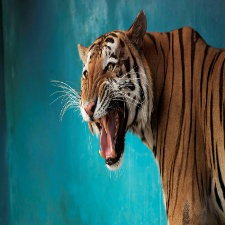

In [29]:
# Testing 1
img = image.load_img('/content/train/tiger/0a5f5db460.jpg',target_size =(225,225))
img

In [30]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
pred = np.argmax(model.predict(x))


1/1 [==============================] - 0s 18ms/step


In [32]:
class_index_to_name = {
    0: 'antelope',    1: 'badger',    2: 'bat',    3: 'bear',    4: 'bee',    5: 'beetle',    6: 'bison',    7: 'boar',    8: 'butterfly',    9: 'cat',    10: 'caterpillar',    11: 'chimpanzee',    12: 'cockroach',    13: 'cow',    14: 'coyote',    15: 'crab',    16: 'crow',    17: 'deer',    18: 'dog',    19: 'dolphin',    20: 'donkey',    21: 'dragonfly',    22: 'duck',    23: 'eagle',    24: 'elephant',    25: 'flamingo',    26: 'fly',    27: 'fox',    28: 'goat',    29: 'goldfish',    30: 'goose',    31: 'gorilla',    32: 'grasshopper',    33: 'hamster',    34: 'hare',    35: 'hedgehog',    36: 'hippopotamus',    37: 'hornbill',    38: 'horse',    39: 'hummingbird',    40: 'hyena',    41: 'jellyfish',    42: 'kangaroo',    43: 'koala',    44: 'ladybugs',    45: 'leopard',    46: 'lion',    47: 'lizard',    48: 'lobster',    49: 'mosquito',    50: 'moth',    51: 'mouse',    52: 'octopus',    53: 'okapi',    54: 'orangutan',    55: 'otter',   56: 'owl',    57: 'ox',    58: 'oyster',    59: 'panda',    60: 'parrot',    61: 'pelecaniformes',    62: 'penguin',    63: 'pig',    64: 'pigeon',    65: 'porcupine',    66: 'possum',    67: 'raccoon',    68: 'rat',    69: 'reindeer',    70: 'rhinoceros',    71: 'sandpiper',    72: 'seahorse',    73: 'seal',    74: 'shark',    75: 'sheep',    76: 'snake',    77: 'sparrow',    78: 'squid',    79: 'squirrel',    80: 'starfish',    81: 'swan',   82: 'tiger',    83: 'turkey',    84: 'turtle',    85: 'whale',    86: 'wolf',    87: 'wombat',    88: 'woodpecker',    89: 'zebra'}
pred_class_name = class_index_to_name.get(pred, 'Unknown')

# Display the predicted class name
print("Predicted class:", pred_class_name)

Predicted class: tiger


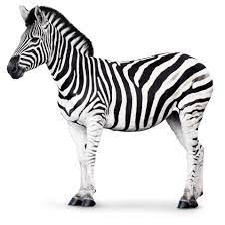

In [45]:
# Testing 2
img = image.load_img('/content/download (1).jpg',target_size =(225,225))
img

In [46]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
pred = np.argmax(model.predict(x))

1/1 [==============================] - 0s 20ms/step


In [47]:
pred_class_name = class_index_to_name.get(pred, 'Unknown')

# Display the predicted class name
print("Predicted class:", pred_class_name)

Predicted class: zebra
